#### Импортирую модули и нахожу расположение датасета:

#### Постановка задачи:

Для запуска программы лояльности (выдача карт лояльности наиболее лояльным клиентам) найти наиболее лояльных клиентов.

#### Алгоритм решения.

1. Изучить данные.
2. Для каждого пользователя определить - стоит ли его включать в нашу аналитическую задачу.
3. Отбросить тех пользователей у которых мало покупок.
4. Для оставшихся пользователей определить самый любимый бренд и какой процент покупок приходится на любимый бренд.
5. Таком образом определить loyality_score.
6. Доработать базовую модель loyality_score.
6. На основании этого сообщить Заказчику каких пользователей можно рекомендовать для участия в акции (1 - самые лояльные).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Загружаю датасет:

In [10]:
df_sales = pd.read_csv('./datasets/purchases_loyality.csv', encoding='windows-1251')

df_sales.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


#### Создаю датафрейм с нужными колонками:

In [11]:
user_df = df_sales[['tc','art_sp']]

user_df.head()

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


#### Придаю смысл названиям колонок:

In [12]:
user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'}, inplace=True)

user_df.head()

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


#### Выделяю название бренда из записи в колонке.

In [13]:
brand_info_string = 'MARAVILLA 500 G Store_Brand'

brand_info_string.split(' ')[-1]

'Store_Brand'

#### Создаю функцию, выделяющую название бренда из строки:

In [14]:
def split_brand(column):
    
    return column.split(' ')[-1]

split_brand(brand_info_string)

'Store_Brand'

#### Применяю функцию к колонке датафрейма через apply:

In [15]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Более компактный способ выделения названия бренда через лямбда-функцию:

In [16]:
user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])

user_df.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


#### Считаю сколько покупок совершил каждый user:

In [17]:
user_purchases = user_df.groupby('user_id', as_index=False) \
                        .agg({'brand_name': 'count'}) \
                        .rename(columns={'brand_name': 'purchases'})

user_purchases.head(6)

,user_id,purchases
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2
5,19972,3


#### Исследование датасета с целью найти критерии для оценки лояльности пользователей:

In [18]:
# Общее количество пользователей:

user_purchases.shape[0]

11764

In [17]:
# Медианное значение количества заказов:

user_purchases.purchases.median()

2.0

In [18]:
# Воспользуюсь describe:

user_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [19]:
# Для оценки лояльности возьму 75 процентиль - выберу те 25% пользователей, которые совершили больше 5 покупок:

user_purchases = user_purchases.query('purchases >= 5')

user_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [20]:
#### Считаю сколько покупок каждого бренда было сделано каждым пользователем:

user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [20]:
user_df.groupby(['user_id', 'brand_name'], as_index=False) \
       .agg({'brand_info': 'count'})

,user_id,brand_name,brand_info
0,-1236394515,Brand_4,1
1,1031,Brand_3,1
2,1031,Store_Brand,5
3,4241,Brand_4,3
4,4241,Store_Brand,2
...,...,...,...
18183,1408817589,Store_Brand,2
18184,1408825059,Brand_1,1
18185,1408832719,Brand_4,3
18186,1408840919,Store_Brand,1


In [21]:
# Смотрю на покупки отдельного пальзователя:

user_df.groupby(['user_id', 'brand_name'], as_index=False) \
       .agg({'brand_info': 'count'}) \
       .query('user_id == 1031')

,user_id,brand_name,brand_info
1,1031,Brand_3,1
2,1031,Store_Brand,5


#### Посчитаю какая доля покупок пользователя приходится на его любимый бренд (если он покупает несколько брендов, то буду рассматривать бренд, на который пришлось болльше 70% покупок):

In [22]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
       .agg({'brand_info': 'count'}) \
       .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
       .groupby('user_id') \
       .head(1) \
       .rename(columns={'brand_name': 'lovely_brand', 'brand_info': 'lovely_brand_purchases'})

lovely_brand_purchases_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [96]:
user_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


#### Считаю какое количество уникальных брендов приобретает каждый из пользователей:

In [23]:
user_unique_brands = user_df.groupby('user_id', as_index=False) \
                            .agg({'brand_name': 'nunique'}) \
                            .rename(columns={'brand_name': 'unique_brands'})

user_unique_brands

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


#### Объединяю датафреймы чтобы получить полную картину:

In [33]:
loyality_df = user_purchases.merge(user_unique_brands, on='user_id') \
                            .merge(lovely_brand_purchases_df, on='user_id')

loyality_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


#### Выделяю клиентов, которые совершили более 5 покупок(сделано до этого) и которые полкупают один бренд:

In [35]:
loyal_users = loyality_df[loyality_df.unique_brands == 1]

#### Формирую метрику лояльности пользователей:

In [37]:
loyality_df['loyality_score'] = loyality_df.lovely_brand_purchases / loyality_df.purchases

loyality_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyality_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


#### Визуализация данных.

In [ ]:
#### Строю распределение scor-a лояльности наших пользователей:

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


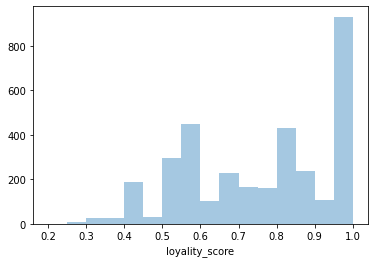

In [44]:
ax = sns.distplot(loyality_df.loyality_score, kde=False)

In [41]:
# Считаю медиану loyality_score:

loyality_df.loyality_score.median()

0.8

In [ ]:
# Это говорит о том, что пользователи с большим числом покупок в целом проявляют лояльность чем не проявляют.

In [56]:
brands_loyality = loyality_df.groupby('lovely_brand', as_index=False) \
                            .agg({'loyality_score': 'median', 'user_id': 'count'})

brands_loyality

,lovely_brand,loyality_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5
5,Brand_7,0.444444,9
6,Store_Brand,0.750000,715


#### Визуализирую сравнение брендов по лояльности:

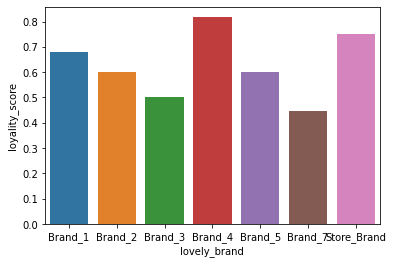

In [57]:
ax = sns.barplot(x='lovely_brand', y='loyality_score', data=brands_loyality)

#### Визуализирую количество пользователей, для которых бренд оказался лояльным:

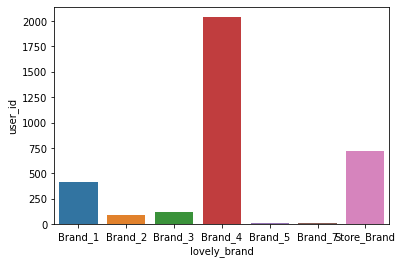

In [58]:
ax=sns.barplot(x='lovely_brand', y = 'user_id', data = brands_loyality)